# **Tutorial 6: Compute and Plot Temperature Anomalies**

**Week 1, Day 1, Climate System Overview**

**Content creators:** Sloane Garelick, Julia Kent

**Content reviewers:** Katrina Dobson, Younkap Nina Duplex, Danika Gupta, Maria Gonzalez, Will Gregory, Nahid Hasan, Sherry Mi, Beatriz Cosenza Muralles, Jenna Pearson, Agustina Pesce, Chi Zhang, Ohad Zivan

**Content editors:** Jenna Pearson, Chi Zhang, Ohad Zivan

**Production editors:** Wesley Banfield, Jenna Pearson, Chi Zhang, Ohad Zivan

**Our 2023 Sponsors:** NASA TOPS

# **Tutorial Objectives**
In the previous tutorials, we have explored global climate patterns and processes, focusing on the terrestrial, atmospheric and oceanic climate systems. We have understood that Earth's energy budget, primarily controlled by incoming solar radiation, plays a crucial role in shaping Earth's climate. In addition to these factors, there are other significant long-term climate forcings that can influence global temperatures. To gain insight into these forcings, we need to look into historical temperature data, as it offers a valuable point of comparison for assessing changes in temperature and understanding climatic influences.

Recent and future temperature change is often presented as an anomaly relative to a past climate state or historical period. For example, past and future temperature changes relative to pre-industrial average temperature is a common comparison. 

In this tutorial, our objective is to deepen our understanding of these temperature anomalies. We will compute and plot the global temperature anomaly from 2000-01-15 to 2014-12-1, providing us with a clearer perspective on recent climatic changes.

# **Setup**


In [ ]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from pythia_datasets import DATASETS
import pandas as pd
import matplotlib.pyplot as plt

##  Figure Settings


###  Figure Settings


####  Figure Settings


#####  Figure Settings


######  Figure Settings


#######  Figure Settings


########  Figure Settings


#########  Figure Settings


##########  Figure Settings


###########  Figure Settings


############  Figure Settings


#############  Figure Settings


##############  Figure Settings


###############  Figure Settings


################  Figure Settings


#################  Figure Settings


##################  Figure Settings


In [ ]:
# @title Figure Settings
import ipywidgets as widgets       # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/ClimateMatchAcademy/course-content/main/cma.mplstyle")

##  Video 1: Video Title


###  Video 1: Video Title


####  Video 1: Video Title


#####  Video 1: Video Title


######  Video 1: Video Title


#######  Video 1: Video Title


########  Video 1: Video Title


#########  Video 1: Video Title


##########  Video 1: Video Title


###########  Video 1: Video Title


############  Video 1: Video Title


#############  Video 1: Video Title


##############  Video 1: Video Title


###############  Video 1: Video Title


################  Video 1: Video Title


#################  Video 1: Video Title


##################  Video 1: Video Title


In [ ]:
# @title Video 1: Video Title
#Tech team will add code to format and display the video

# **Section 1: Compute Anomaly**

First, let's load the same data that we used in the previous tutorial (monthly SST data from CESM2):

In [ ]:
filepath = DATASETS.fetch('CESM2_sst_data.nc')
ds = xr.open_dataset(filepath)
ds

We'll compute the climatology using xarray's `groupby` operation to split the SST data by month. Then, we'll remove this climatology from our original data to find the anomaly:

In [ ]:
# group all data by month
gb = ds.tos.groupby('time.month')

# take the mean over time to get monthly averages
tos_clim = gb.mean(dim='time')

# subtract this mean from all data of the same month
tos_anom = gb - tos_clim
tos_anom

Let's try plotting the anomaly from a specific location:

In [ ]:
tos_anom.sel(lon=310, lat=50, method='nearest').plot();
plt.ylabel('tos anomaly')

Next, let's compute and visualize the mean global anomaly over time. We need to specify both `lat` and `lon` dimensions in the `dim` argument to `mean()`:

In [ ]:
unweighted_mean_global_anom = tos_anom.mean(dim=['lat', 'lon'])
unweighted_mean_global_anom.plot();
plt.ylabel('global mean tos anomaly')

Notice that we called our variable `unweighted_mean_global_anom`. Next, we are going to compute the  `weighted_mean_global_anom`. Why do we need to weight our data? Grid cells with the same range of degrees latitude and longitude are not necessarily same size. Specifically, grid cells closer to the equator are much larger than those near the poles, as seen in the figure below (Djexplo, 2011, CC-BY). 

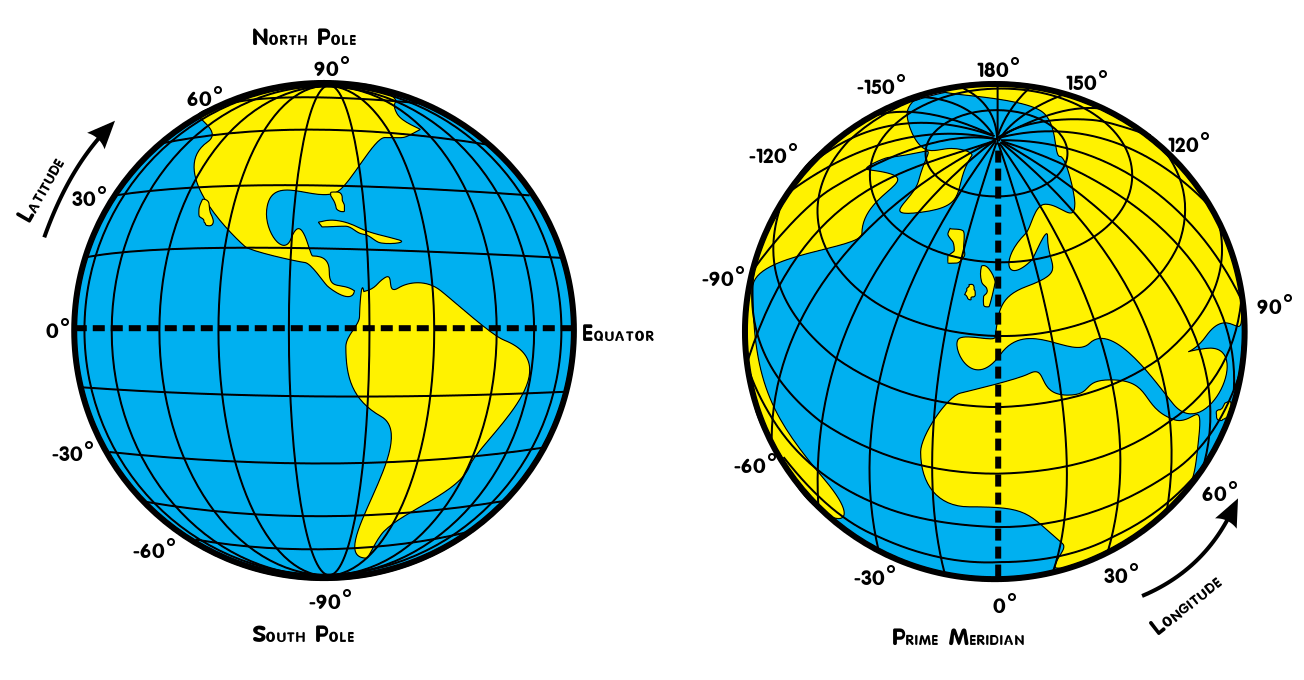

Therefore, an operation which combines grid cells of different size is not scientifically valid unless each cell is weighted by the size of the grid cell. Xarray has a convenient [`.weighted()`](https://xarray.pydata.org/en/stable/user-guide/computation.html#weighted-array-reductions) method to accomplish this.

Let's first load the grid cell area data from another CESM2 dataset that contains the weights for the grid cells:

In [ ]:
filepath2 = DATASETS.fetch('CESM2_grid_variables.nc')
areacello = xr.open_dataset(filepath2).areacello
areacello

Let's calculate area-weighted mean global anomaly:

In [ ]:
weighted_mean_global_anom = tos_anom.weighted(areacello).mean(dim=['lat', 'lon'])

Let's plot both unweighted and weighted means:

In [ ]:
unweighted_mean_global_anom.plot(size=7)
weighted_mean_global_anom.plot()
plt.legend(['unweighted', 'weighted']);
plt.ylabel('global mean tos anomaly')

## **Questions 1: Climate Connection**

1. What is the significance of calculating area-weighted mean global temperature anomalies when assessing climate change? How are the weighted and unweighted SST means similar and different? 
2. What overall trends do you observe in the global SST mean over this time? How does this magnitude and rate of temperature change compare to past temperature variations on longer timescales (refer back to the figures in the video)?


[*Click for solution*](https://github.com/NeuromatchAcademy/course-content/tree/main/tutorials/W1D1_ClimateSystemOverview/solutions/W1D1_Tutorial6_Solution_d05ad784.py)



# **Summary**

In this tutorial, we focused on historical temperature changes. We computed and plotted the global temperature anomaly from 2000 to 2014. This helped us enhance our understanding of recent climatic changes and their potential implications for the future.




# **Resources**

Code and data for this tutorial is based on existing content from [Project Pythia](https://foundations.projectpythia.org/core/xarray/computation-masking.html).